In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.utils import Bunch
import matplotlib.pyplot as plt
import warnings
import pickle

Turn off Warning messages, and define path to pickle

In [2]:
warnings.filterwarnings("ignore") 
my_file_and_path = "../pickled_clips.pklz"

Open pickle and save it to `dataStore`

In [3]:
with open(my_file_and_path, 'rb') as fh:
    dataStore = pickle.load(fh)

Splitting Data

In [4]:
train, test, train_label, test_label = train_test_split(dataStore.data, dataStore.target, test_size=0.2, shuffle=True)

Defining pipeline to normalize and scale

In [5]:
pipe = Pipeline([('Normalizer', Normalizer()), ('StandardScaler', StandardScaler())])
train = pipe.fit_transform(train, train_label)
test = pipe.transform(test)

# PCA

In [6]:
pca = PCA(n_components=4)
pcaTrain = pca.fit_transform(train)
pcaTest = pca.transform(test)

Graphing

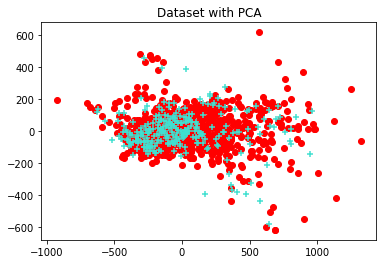

In [7]:
plt.figure(0)
plt.title("Dataset with PCA")
plt.scatter(pcaTrain[:,0], pcaTrain[:,1], c='red', marker='o')
plt.scatter(pcaTest[:,0], pcaTest[:,1], c='turquoise', marker='+')
plt.savefig("../graphs/pca-graphed.png")

# t-SNE

In [8]:
tsne = TSNE(n_components=2)
tTrain = tsne.fit_transform(train)
tTest = tsne.fit_transform(test)

graphing 

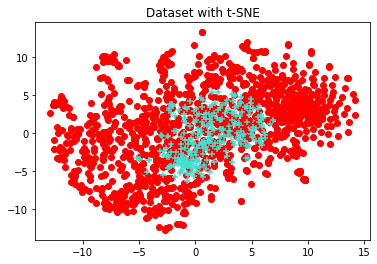

In [9]:
plt.figure(1)
plt.title("Dataset with t-SNE")
plt.scatter(tTrain[:,0], tTrain[:,1], c='red', marker='o')
plt.scatter(tTest[:,0], tTest[:,1], c='turquoise', marker='+')
plt.savefig("../graphs/tsne-graphed.png")

# LDA

In [10]:
lda = LDA(n_components=2)
ldaTrain = lda.fit_transform(train, train_label)
ldaTest = lda.transform(test)

In [11]:
plt.figure(2)
plt.title("Dataset with LDA")
plt.scatter(ldaTrain[:,0], ldaTrain[:,1], c='red', marker='o')
plt.scatter(ldaTest[:,0], ldaTest[:,1], c='turquoise', marker='+')
plt.savefig("../graphs/lda-graphed.png")